In [1]:
import numpy as np
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import pickle

from my_utils import Transition, ReplayMemory
from models import  DQN_H2, DQN_H5

from tqdm import tqdm as progress_bar

from sklearn.model_selection import train_test_split

from PIL import Image
from tqdm import tqdm as progress_bar
import cv2
import umap

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



/home/rachel/anaconda3/envs/probes/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/rachel/anaconda3/envs/probes/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/rachel/anaconda3/envs/probes/lib/python3.10/site-packages/umap/d

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
# EXPERIMENT_NAME ='2_asteroids-v4_1000_epoch_H2_tau_1000'
# EXPERIMENT_NAME ='asteroids-v4_1000_epoch_H2_tau_100'
# EXPERIMENT_NAME ='asteroids_1000_epoch_h2_tau_.005'
# EXPERIMENT_NAME ='asteroids_1000_epoch_FLAT_tau_.005'
# EXPERIMENT_NAME ='asteroids-v4_100_epoch_H5_tau_.005'
EXPERIMENT_NAME ='asteroids-v4_1000_epoch_H2_tau_100'
seeds = [42,43,44,45,46,47]
seed = 43
path = f'/home/rachel/temp/dqn_asteroid_probe/embeddings/{EXPERIMENT_NAME}_{seed}_test_activations.pkl'


In [44]:
with open(path, 'rb') as f:
        d = pickle.load(f)

In [45]:
d[0]['h1'] == d[1]['h1']

tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, F

In [46]:
print(d[0].keys())
# h1 = [x['h0'].squeeze().cpu().numpy()  for  x in d]
h0 = [x['h1'].squeeze().cpu().numpy()  for  x in d]
h1 = [x['h1'].squeeze().cpu().numpy()  for  x in d]
h2 = [x['h2'].squeeze().cpu().numpy() for  x in d]
logits = [x['dqn_logits'].cpu().numpy().squeeze()  for  x in d]
y = [x['real_choice'] for x in d]

# make umap plots




odict_keys(['h0', 'h1', 'h2', 'dqn_logits', 'real_choice'])


In [47]:
logits[0].shape

(14,)

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(h0, y, test_size=0.33, random_state=42)
# clf_h0 = LogisticRegression()
# clf_h0.fit(X_train, y_train)

X_train0, X_test0, y_train0, y_test0 = train_test_split(h0, y, test_size=0.33, random_state=42)
clf_h0 = LogisticRegression()
clf_h0.fit(X_train0, y_train0)
classes0 = clf_h0.predict(h1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(h1, y, test_size=0.33, random_state=42)
clf_h1 = LogisticRegression()
clf_h1.fit(X_train1, y_train1)
classes1 = clf_h1.predict(h1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(h2, y, test_size=0.33, random_state=42)
clf_h2 = LogisticRegression()
clf_h2.fit(X_train2, y_train2)
classes2 = clf_h2.predict(h2)

/home/rachel/anaconda3/envs/probes/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rachel/anaconda3/envs/probes/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [49]:
y_test1 == y_test2

True

0.9111969111969112
0.9111969111969112
0.918918918918919
[1, 1]


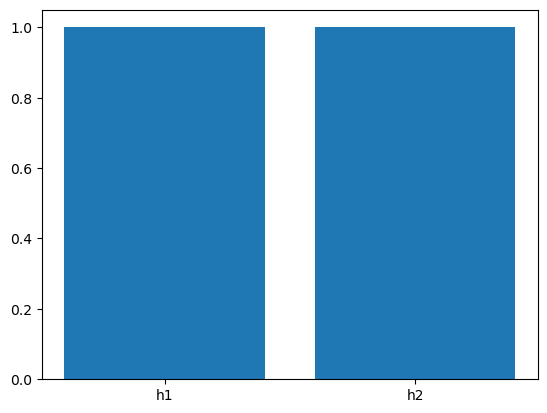

In [50]:
preds0 = clf_h0.predict(X_test0)
preds1 = clf_h1.predict(X_test1)
preds2 = clf_h2.predict(X_test2)

print(np.sum(preds0 == y_test0) / len(preds0))
print(np.sum(preds1 == y_test1) / len(preds1))
print(np.sum(preds2 == y_test2) / len(preds2))
map_ = {False:-1, True:1}
# Just Indiana Jones out here
a = [map_[preds1[0]== y_test1[0]], map_[preds2[0]== y_test1[0]]] #example list of values
print(a)
plt.bar(['h1', 'h2'], a)
plt.show()

#TODO - save
# for i, y in enumerate(y_test1):

In [51]:
for i, p in enumerate(preds2):
    if p != y_test2[i]:
        print(i)

13
15
29
32
35
36
37
61
71
91
149
152
155
163
183
190
192
214
247
257
258
258


13
15
29
32
35
36
37
61
71
91
149
152
155
163
183
190
192
214
247
257
258


258

In [52]:
preds0

array([ 1,  1,  2,  7,  7,  7,  6,  2,  2,  7,  5,  6,  2,  5,  6,  5,  5,
        6,  2,  6,  6,  5,  2,  1,  2,  7,  6,  1,  1,  2,  1,  6,  8,  7,
        1,  1,  5,  5,  7,  1,  1,  6,  6,  6,  2,  6,  7,  1,  2,  6,  7,
        6,  0,  7,  7,  2,  5,  1,  7,  1,  1,  0,  7,  0,  0,  1,  6,  6,
        1,  5,  1,  5,  2,  2,  7,  1,  1,  7,  7,  2,  6,  6,  7,  6,  6,
        1,  1,  6,  1,  7,  6,  7,  6,  2,  5,  1,  7,  2,  7,  2,  6,  1,
        6,  2,  1,  7,  6,  1,  7,  1,  1,  1,  1,  2,  2, 10,  1,  1,  2,
        1,  1,  1,  6,  0,  1,  6,  1,  1,  5,  0,  7,  7,  1,  6,  7,  2,
        7,  2,  7,  6,  6,  8,  7,  6,  6,  6,  6,  1,  2,  0,  6,  7,  2,
        2,  7,  2,  7,  6,  8,  2,  0,  6,  1,  7,  1,  7,  6,  6,  7,  0,
        1,  1,  0,  6,  1,  0,  7,  7,  6,  6,  1,  1,  6,  5,  0,  1,  8,
        0,  0,  2,  5,  7,  5,  8,  1,  2,  2,  2,  1,  7,  7,  5,  1,  8,
        1,  1,  8,  1,  6,  6,  1,  6,  1,  2, 10,  6,  7,  6,  8,  1,  1,
        6,  1,  2,  6,  6

In [53]:
# (n_samples, n_features) 
h0 = np.stack(h0)
h0.shape

h1 = np.stack(h1)
h1.shape

h2 = np.stack(h2)
h2.shape

(783, 256)

In [59]:
name = "Final Embeddings"
classes = y
data = logits

reducer = umap.UMAP()

scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

map_ = {0:0, 1:1, 2:2, 3:3, 5:5, 6:6, 7:7, 9:9, 10:10, 11:11, 13:13, 12:12, 4:4}

# predsz = [map_[x] for x in classes]

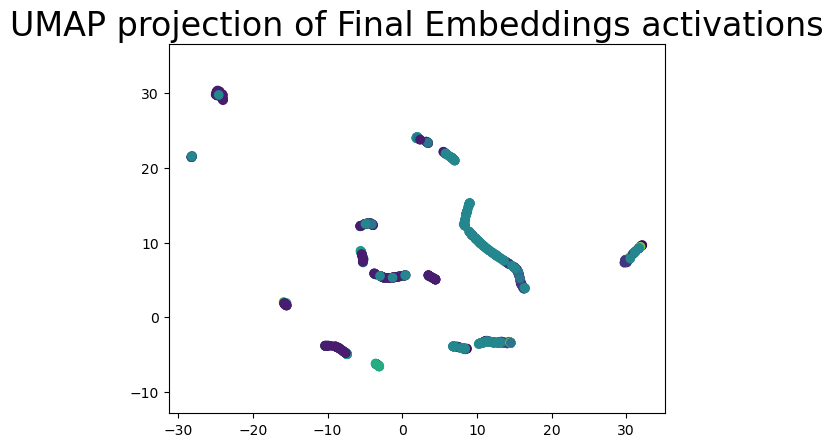

In [60]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=classes
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection of {name} activations', fontsize=24);


In [41]:
y

[0,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 2,
 0,
 6,
 2,
 2,
 11,
 12,
 6,
 2,
 0,
 0,
 2,
 2,
 6,
 6,
 6,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 6,
 2,
 6,
 6,
 0,
 2,
 2,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 2,
 2,
 6,
 6,
 2,
 2,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 13,
 6,
 6,
 6,
 13,
 6,
 6,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 8,
 8,
 8,
 1,
 7,
 7,
 1,
 10,
 10,
 10,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 5,
 7,
 7,
 2,
 7,
 7,
 7,
 7,
 7,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 10,
 2,
 7,
 7,
 7,
 7,
 5,
 5,
 7,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 10,
 2,
 10,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 5,
 5,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5